In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score,precision_score,recall_score,confusion_matrix

In [9]:
cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df["Diagnosis"]=cancer.target

In [10]:
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [16]:
Scalar= StandardScaler()
X=Scalar.fit_transform(X)
X=pd.DataFrame(X, columns=cancer.feature_names)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model= LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_predict=model.predict(X_test)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1-Score:", f1_score(y_test, y_predict))
print("mse:", mean_squared_error(y_test, y_predict))
print("r2:", r2_score(y_test, y_predict))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1-Score: 0.979020979020979
mse: 0.02631578947368421
r2: 0.8879790370127744


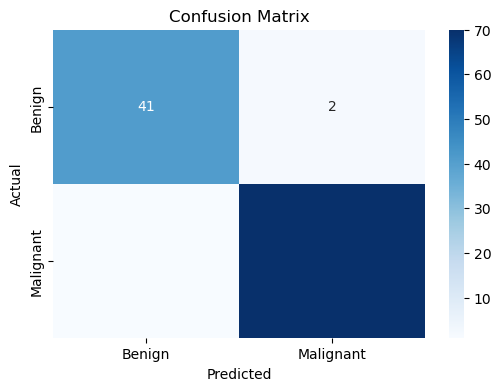

In [46]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()